### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2016 ###

# Fiber Optic Network Topology Optimization #

#### Sahit Mandala (mandala@wisc.edu) and Wayne Chew (Ming Chan, mchew2@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Assumptions](#2.A-Assumptions)
  1. [Model](#Part-A:-Minimal-connected-graph-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##
Our project is focused on finding and constructing an optimal computer network layout, or network topology, for a provided set of machines which contrasts performance with cost. In particular, we aim to minimize cost by efficiently connecting the network with maximum bandwidth while using budget-conscious tradeoffs in equipment choices. Our approach to this problem attempts to decouple these 2 methods to build a computationally tractable method for estimating seemingly optimal network designs and understanding the relationship between budget and performance.

Network topology is at the heart of today's hierarchacal internet infrastructure, from connecting machines in an office to datacenters between continients. Organizations and private companies would like to provide connectivity and performance while reducing the amount of infrastructure and overall costs they must incur. One instance of this problem is in fiber optic network infrastructure for tier 1 networks, which manage the backbone of internet traffic nationally and internationally.

Nowadays, fiber optic cable is said to be the best cable because of its speed and reliability. However, it is not fully installed in every city because of its cost ([citations](http://broadbandnow.com/Fiber)). The cost for the cable itself is not that high but the cost of installing the cable is the problem. It takes a lot of money to for construction, apparatus, and manpower ([citations](http://www.firetide.com/blog/what-is-the-real-cost-of-fiber-networking/)). The per mile cost for installing the cable range from \$10,000 to \$100,000. Hence, we would like to find the shortest path to install the cable so that all cities are connected ([citations](http://www.itscosts.its.dot.gov/its/benecost.nsf/DisplayRUCByUnitCostElementUnadjusted?ReadForm&UnitCostElement=Fiber+Optic+Cable+Installation+&Subsystem=Roadside+Telecommunications+)).

Furthermore, there are different types of fiber optic cables. Higher quality cables will cost more per mile while lower quality cables will cost less per mile. For example, single mode fiber optic cable have higher throughput but at a higher cost, while multimode fiber optic cables have lower bandwidth but are cheaper. By instinct, the best way is to install the higher quality cables since it is more reliable and faster. However, if there is a budget constraint, you might not have enough money to install high quality cables for all cities. Hence, you have to find a way to maximize the amount of high quality connection and while staying below the budget at the same time. ([citations](http://www.bluewavemicro.net/blog/single-mode-vs-multi-mode-fiber-transceivers/))

![fixit flowchart][flow]

We consider the task of a major Internet company (e.g. Google) or cable company tasked with the role of connecting several major cities (each with a data center for routing) across the US via fiber optic cables. The company would like to minimize the cost while maximizing performance for its users. They have the option of using 2 types of cables, similar to single mode and multimode fiber optic cable, each with their own cost and associated performance. The company also has to find a way to connect all the cities, so that traffic can flow from any data center to any other data center. What is the optimal network design, including optimal choice of cabling, for any given budget?

To do so in a computational feasible manner, we aim to solve 2 separated problems, one aimed at modeling the total network to achieve connectivity while minimizing cost. With this choice of connections, we then attempt to assign cables across these connections. We consider multiple budget restrictions and find the optimal assignment which gives maximal performance, particularly in terms of bandwidth, across the entire network.

Our choice of data, the sample cities, is based upon Zayo's current distribution of US-based data centers for its fiber optic network. Zayo offers a fiber optic network infrastructure, with centers in most major cities. We have removed several cities which were located closely to other cities (within 50 miles, such as Irvine, CA) and added several other major cities for analytical purposes. We used Python's geopy library to generate the Vincenty distance and lat-long coordinates across cities.

[flow]: http://www.metronetzing.org/images/dynamic/image/national.jpg?1288882944959

## 2. Mathematical model ##


### Details
Our overall goal was to construct a fiber optic network with trade-offs between costs and bandwidth offered by the network. To do this, we sought a network over the 2-cables that are used for fiber optic networks. We aimed to minimize the cost of the whole network while maximizing the total weighted average bandwidth over the network. However, coupling these 2 goals together proved difficult, both in model complexity and computational tractability. So instead, we divided the model into 2 components, with the solution to the 1st becoming the input parameter to the 2nd.

Our first model is a minimal connected graph over all nodes using a MIP formulation. Here, we attempt to calculate the optimium subgraph using a network flow "subproblem". Here, we want to find a subgraph with all vertices for which there exists atleast 1 path from a chosen node to every other node, implying that the subgraph is connected. To do so, we fix some node as a source with supply flow of n-1 units. Then we then set every other node as a sink with demand of 1 unit. Every edge can have unlimited flow across it. The only way for this supply and demand to be satisfied is for the supply to be distributed across all nodes, each consuming 1 unit of this flow; that is, there must exist atleast 1 path for the flow from this source to every sink. Hence, we much choose edges in our subgraph such that this flow problem "constraints" have some solution, implying connectivity. To achieve the cheapest such subgraph, we minimize the weighed sum of the edges chosen with their weights. 

With this subgraph from this first problem as a parameter, we then move on to solve another integer program which, given a budget, aims assigns a cable type to each edge in the subgraph such that the weighted average bandwidth, which is a based on the distance of the edge and bandwidth, is maximized, providing maximial performance (in terms of bandwidth). The costs are bounded by the budget, so we can find the best possible assignment of cables for each given budget, forming a "tradeoff" curve.

We make a quick note that because we are allowing connections between any pairs of cities/nodes, we are considering any edges between any nodes $i,j \in V$ (as opposed to $i,j \in V$ s.t. $(i,j) \in E$, which is equivalent but for general graphs.)

### 2.A Assumptions

In this project, we made a few assumptions. We will operate under the generalization that each mile of fiber optic, for a given type of wire, has a constant cost. This estimate excludes upfront all fixed and long term costs of maintainance, management, etc. Hence, the cost becomes directly proportional to the distance across all wires. We also assume that the fiber optic cables can be run directly between locations in a "straight" line (on a curved Earth), between any pair of cities. This means we ignore the ramifications of infrastructure, geography, and socioeconomic policy which would affect the costs and feasibility of these installation routes. For our distance measures between locations, we use the Vincenty formula, which approximates straight line distances on an elipsoidal Earth. 

We assume that the cost for the installation of fiber optic cable is the same cost per mile for the respective cables regardless of the location it is installed. We also assume that there are only two types of fiber optic cables. Cable 1 with a bandwidth of 1Gbps and 20k (in dollars) cost per mile and Cable 2 with a bandwidth of 10Gbps and 45k cost per mile. We also utilize that the weighted average of bandwidth on a given cable with the amount of cabling used, over the entire network, as a metric for average bandwidth performance. We ignore any latency or performance loss from routing, data centers, etc.

Finally, we make a distinctive choice in decoupling the problem into 2 subproblems. We are not guaranteed an optimal solultion in general when we separate a single optimization model in 2 smaller ones. However, we expect that this model will provide a pretty good solution, if not optimial, while also making the computation tractable. By minimizing the total distances across the network, we create a graph with connectedness that has minimal distance. This by itself provides a minimal solution that reduces distances, which inherently should align with the minimal cost goals of the original problem. Then, in assigning cable types to edges, we are looking to minimize costs with maximal bandwidth, as opposed to connectivity which is seemingly unrelated (in our model) to either of those goals. Overall, it seems these 2 different goals can be decoupled and solve separately without too much overlap or loss of too much information.

### Part A: Minimal connected graph model

### Parameters
$V$: Set of vertices (i.e. cities) over our graph

$n$: Number of unique vertices in graph ($n=|V|$)

$c$: n by n weighted adjecency matrix of distances between node i and j: 

### Decision variables:
We use $x_{i,j}$ as an indicator matrix for whether the edge from i to j is included within our subgraph solution. We note that because our network flow formulation allows flow bidirectionally on each "undirected" edge

$$
\begin{aligned}
x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

We use a nonnegative variable, to encode information about the network flow between nodes i and j, as part of the connectivity solution; Noting that the max flow over any edge is n-1 because there is only n-1 supply over the whole network (from node 1),:

$$
\begin{aligned}
n-1 \geq flow_{i,j} \geq 0 && \forall i,j \in V
\end{aligned}
$$


### Constraints:

We do not want to consider self loops on nodes as prospective edges.

$$
\begin{aligned}
& flow_{i,i}=0 && \forall i \in V \\
x_{i,i}=0 && \forall i \in V
\end{aligned}
$$

For node 1 (any arbitrary node chosen from S), we have a source node with n-1 unit supply. We utilize the conservation of flow equations across incoming and outgoing edges to form this constraint:

$$
(n-1)+\sum_{j \in V} flow_{j,1}*x_{j,1}-\sum_{j \in V} flow_{1,j}*x_{1,j} = 0
$$

For all nodes $i \in V$ with $i \neq 1$, they have net demand 1. Thus, the conservation of flow equations becomes:

$$\sum_{j \in V} flow_{j,i}*x_{j,i}-\sum_{j \in V} flow_{i,j}*x_{i,j} = 1$$

We would like to encode a constaint to force flows only over edges that are "included". That is, if there exists a flow from nodes i to j for $i,j \in V$, then $x_{i,j}=1$. We can use our upper limit $n-1$ from on the flow variable to write an equivalent inequality constraint:

$$
\begin{aligned}
(n-1)*x_{i,j} \geq flow_{i,j} && \forall i,j \in V
\end{aligned}
$$

### Objective: 
Our choice of edges in our subgraph seeks to minimize the total cost across all included edge weights. To do so, we calculate the weighted sum of each edges' weight (i.e. distance) with $x_{i,j}$, the binary indicator of whether it is included in our subgraph:

$$f(x)=\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}$$

### Standard form
Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j} \\
\text{subject to:}\qquad
& (n-1)+\sum_{j \in V} flow_{j,1}*x_{j,1}-\sum_{j \in V} flow_{1,j}*x_{1,j} = 0 \\
& \sum_{j \in V} flow_{j,i}*x_{j,i}-\sum_{j \in V} flow_{i,j}*x_{i,j} = 1 && 1 \neq i \in V \\
& (n-1)*x_{i,j} \geq flow_{i,j} && \forall i,j \in V \\
& n-1 \geq flow_{i,i}=0 && \forall i \in V \\
& x_{i,i}=0 && \forall i \in V \\
& flow_{i,j} \geq 0 && \forall i,j \in V \\
& x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

### Solution

The directed adjacency matrix $x$. We note that this encodes a directed graph adjacency matrix; in our solution, we treat these edges as undirected since our fiber optic network connections are bidirectional. Hence, this undirected graph becomes our optimal network.

### Part B: Cost-Bandwidth tradeoff on 2-Cable system model

### Parameters
$cost1$: Cost per mile for cable 1 (in dollars)

$cost2$: Cost per mile for cable 2 (in dollars)

$V$: Set of vertices (i.e. cities) over our graph

$n$: Number of unique vertices in graph ($n=|V|$)

$x$: n by n adjecency matrix of minimal connected graph

$c$: n by n weighted adjecency matrix of distances between node i and j

$budget$: Upper limit on the total cost of the networking; varied to show "tradeoff" with average bandwidth

### Decision variables:
We use $edge1$ and $edge2$ as indicator matrices for whether the edge from i to j used cable type 1 or cable type 2 respectively.

$$
\begin{aligned}
edge1_{i,j} \in {\{0,1\}} && \forall i,j \in V \\
edge2_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$


### Constraints:

Every edge in either $edge1$ or $edge2$ must be an edge in $x$, the original graph. Furthermore, every edge in this graph must be included in either one of $edge1$ or $edge2$. And of course, $edge1$ and $edge2$ cannot share any edges. To achieve this, we require the sum of the 2 adjacency matrices to equal the adjacency matrix $x$. Then for each $(i,j)$, if $x_{i,j}=1$, then exactly one of $edge1_{i,j}=1$ or $edge2_{i,j}=1$, but not both. And if $x_{i,j}=0$, both $edge1_{i,j}=0$ and $edge2_{i,j}=0$.

$$
\begin{aligned}
edge1_{i,j}+edge2_{i,j}=x_{i,j} && \forall i \in V
\end{aligned}
$$

The total cost of the network design must be less than the budget. The cost of each edge in the network can be written as $cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j}$. If $edge_{i,j}=1$, the either $edge1_{i,j}=1$ or $edge2_{i,j}=1$ (but not both). So then this expression is $cost1*c_{i,j}$ or $cost2*c_{i,j}$ respectively, which is the cost of that edge. We do this sum over all pairs of vertices:

$$
\sum_{i \in V}\sum_{j \in V}cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j} \leq budget
$$


### Objective: 
Our choice of edges in our subgraph seeks to maximize the weighted average bandwidth. To calculate this, we do a weighted sum of $edge1$'s cables with their distances and bandwidth and $edge2$'s cables with their distances and bandwidth. We then divide by the total distance across entire network to get the weigthed average. This weighted average roughly indicates the expected bandwidth and thus performance across the network.

$$f(x)=\frac{\sum_{i \in V}\sum_{j \in V}bandwidth1*c_{i,j}*edge1_{i,j}+bandwidth2*c_{i,j}*edge2_{i,j}}{\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}}$$

### Standard form
Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \frac{\sum_{i \in V}\sum_{j \in V}bandwidth1*c_{i,j}*edge1_{i,j}+bandwidth2*c_{i,j}*edge2_{i,j}}{\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}} \\
\text{subject to:}\qquad
& edge1_{i,j}+edge2_{i,j}=x_{i,j} && \forall i \in V \\
& \sum_{i \in V}\sum_{j \in V}cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j} \leq budget \\
& edge1_{i,j} \in {\{0,1\}} && \forall i,j \in V \\
& edge2_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

### Solution

The 2 adjacency matricies $edge1$, $edge2$ which indicate which edges are constructed with Cable 1 and Cable 2 respectively.

## 3. Solution ##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **I will be running your code**. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.

In [1]:
using JuMP
using Ipopt
using Clp
using NamedArrays
using PyPlot
using PyPlot
using PyCall
@pyimport mpl_toolkits.basemap as basemap

/Users/patron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Data

In [2]:
# Zayo Data centers

#Parameter: V, Array of centers
centers = [
    "Ashburn, VA", 
    "Atlanta, GA",
    "Austin, TX",
    "Boise, ID",
    "Boston, MA",
    "Chicago, IL",
    "Cincinnati, OH",
    "Dallas, TX",
    "Denver, CO",
    "Las Vegas, NV",
    "Los Angeles, CA",
    "Miami, FL", 
    "Minneapolis, MN",
    "Nashville, TN",
    "New York, NY",
    "Palo Alto, CA",
    "Seattle, WA"
];

# Adjacency matrix of distances (in miles) between cities, which will the the weights on each edge
raw = [
0 530.09 1298.47 2019.68 407.64 568.43 377.67 1163.11 1466.9 2061.18 2274.22 927.81 907.4 546.61 219.44 2408.07 2301.47; 
530.09 0 819.05 1835.68 936.77 587.61 369.12 720.98 1211.82 1746.3 1936.72 604.25 907.48 214.41 747.91 2127.93 2182.0;
1298.47 819.05 0 1369.13 1695.9 978.7 966.71 181.41 770.49 1084.97 1227.24 1114.85 1043.11 753.26 1514.07 1483.42 1770.16; 
2019.68 1835.68 1369.13 0 2260.77 1451.59 1666.27 1288.75 638.33 517.03 668.68 2363.43 1137.39 1636.24 2153.05 528.88 404.84; 
407.64 936.77 1695.9 2260.77 0 850.51 740.15 1551.6 1769.63 2375.49 2596.47 1255.68 1123.74 942.98 188.88 2695.68 2492.19; 
568.43 587.61 978.7 1451.59 850.51 0 251.98 804.53 920.44 1525.31 1745.96 1188.01 355.4 396.76 713.32 1854.17 1737.66; 
377.67 369.12 966.71 1666.27 740.15 251.98 0 814.07 1093.91 1684.43 1896.68 952.06 605.37 237.64 570.01 2035.78 1971.4; 
1163.11 720.98 181.41 1288.75 1551.6 804.53 814.07 0 662.38 1071.64 1240.4 1110.68 862.67 617.53 1374.14 1467.73 1681.41; 
1466.9 1211.82 770.49 638.33 1769.63 920.44 1093.91 662.38 0 606.85 831.19 1725.4 699.41 1022.67 1632.05 941.87 1021.34; 
2061.18 1746.3 1084.97 517.03 2375.49 1525.31 1684.43 1071.64 606.85 0 227.85 2181.13 1296.22 1580.67 2234.21 398.66 871.0; 
2274.22 1936.72 1227.24 668.68 2596.47 1745.96 1896.68 1240.4 831.19 227.85 0 2339.02 1523.57 1780.85 2451.84 320.99 958.82; 
927.81 604.25 1114.85 2363.43 1255.68 1188.01 952.06 1110.68 1725.4 2181.13 2339.02 0 1511.2 814.76 1090.82 2578.14 2733.5;
907.4 907.48 1043.11 1137.39 1123.74 355.4 605.37 862.67 699.41 1296.22 1523.57 1511.2 0 697.01 1019.23 1583.16 1395.08; 
546.61 214.41 753.26 1636.24 942.98 396.76 237.64 617.53 1022.67 1580.67 1780.85 814.76 697.01 0 760.88 1952.83 1974.66;
219.44 747.91 1514.07 2153.05 188.88 713.32 570.01 1374.14 1632.05 2234.21 2451.84 1090.82 1019.23 760.88 0 2567.48 2408.45;
2408.07 2127.93 1483.42 528.88 2695.68 1854.17 2035.78 1467.73 941.87 398.66 320.99 2578.14 1583.16 1952.83 2567.48 0 701.45; 
2301.47 2182.0 1770.16 404.84 2492.19 1737.66 1971.4 1681.41 1021.34 871.0 958.82 2733.5 1395.08 1974.66 2408.45 701.45 0;
];
distance = NamedArray(raw, (centers,centers), ("from","to"))
# Parameter: n, number of vertices
n = length(centers)

# Coordinate data of each city, used for plotting on map
data = [
39.0437192 -77.4874898;
33.7490987 -84.3901848;
30.2711286 -97.7436994;
43.61656 -116.2008349;
42.3604823 -71.0595677;
41.8755546 -87.6244211;
39.1014537 -84.5124601;
32.7762719 -96.7968558;
39.7391536 -104.9847033;
36.1662859 -115.1492249;
34.0543942 -118.2439408;
25.7742658 -80.1936588;
44.9772995 -93.2654691;
36.1622296 -86.774353;
40.7305991 -73.9865811;
37.442156 -122.1634471;
47.6038321 -122.3300623;
];
lat = Dict(zip(centers,data[:,1]));
lon = Dict(zip(centers,data[:,2]));

# Cost for the cables per mile and the budget
cost1 = 20; # cost per mile (in 1000s)
cost2 = 45;

bandwidth1 = 1; # bandwidth of Cable 1, in Gbps;
bandwidth2 = 10; # bandwidth of Cable 2;

### Helper functions

In [3]:
# US Network Map plotter; Credits to Prof. Lessard
# Generates a US plot of graph solution based on "edge" decision variable
function mapSolution(x=0)
    # US Map plot for background
    m=basemap.Basemap(projection="merc", resolution="l",llcrnrlat=23,llcrnrlon=-126,urcrnrlat=50,urcrnrlon=-70)
    m[:drawmapboundary](fill_color="#4771a5")
    m[:fillcontinents](color="#555555")

    # plot cities, based on lat, long coordinates
    for i in centers
        m[:plot](lon[i], lat[i], "ro" ,latlon=true)
    end
    
    # Plot each edge included in network from the solution matrix
    for i in centers
        for j in centers
            if x[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="b")
            end
        end
    end
end;

# US Network map plotter for 2-cable network; plots 2 subgraphs with different colors
function mapSolutionB(x=0, y=0)
    m=basemap.Basemap(projection="merc", resolution="l",llcrnrlat=23,llcrnrlon=-126,urcrnrlat=50,urcrnrlon=-70)
    m[:drawmapboundary](fill_color="#4771a5")
    m[:fillcontinents](color="#555555")

    # plot cities, based on lat, long coordinates
    for i in centers
        m[:plot](lon[i], lat[i], "ro" ,latlon=true)
    end
    
    # Plot each edge included in network, from each adj matrix, onto the map with color-coding
    for i in centers
        for j in centers
            if x[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="b")
            end
            if y[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="g")
            end
        end
    end
end
;

# Subset generator:
# Given a number n, it generators all subsets of the set {1,2,...,n}
# Returns array of arrays, each array representing a subset
function genSubsets(nn)
    if (nn==1) # Base case
        return Array[[1],[]]
    else
        # Recursively include, exclude current element in subsets
        sol = genSubsets(nn-1);
        for i in 1:length(sol)
            push!(sol,[sol[i];nn])
        end
        return sol
    end
end;

### Part A: Minimal connected graph

In [4]:
m = Model()

### Decision Variables ###

# Binary matrix variable x_i,j
@variable(m, edge[centers,centers], Bin) 

# Flow variable, how much flow over edge (no upper limit)
@variable(m, flow[centers,centers] >=0) 


### Constraints ###

for i in centers
    # Self-loops not allowed
    @constraint(m, edge[i,i]==0)
    @constraint(m, flow[i,i]==0)
    
    ## If flow on edge i,j, then we need edge i,j in network (so edge_i,j=1)
    for j in centers
        @constraint(m,flow[i,j] <= (n-1)*edge[i,j]) # encodes "if flow >0, then edge==1" 
    end
    
    # Conservation of flow equations
    if (i==centers[1])
        
        # "1st" node is source, we have unit supply flow of n-1, so (n-1) + net inflow - net outflow = 0
        @constraint(m, n-1 + sum{flow[c,i], c=centers} - sum{flow[i,c], c in centers} ==0); # center 1 has (n-1 inflow,)
    else
        
        # Other nodes have demand of 1 unit, so inflow - outflow = 1
        @constraint(m, sum{flow[c,i], c=centers}-sum{flow[i,c], c in centers}==1); #Every other node has 1 outflow
    end
end

### Objective function: Min total cost of weights on solution network edges ###
@objective(m, Min, sum{edge[i,j]*distance[i,j], i in centers, j in centers});


s=solve(m);
edgeResult = getvalue(edge);

### Part B: 2-Cable tradeoff

In [5]:
# Calculates the total distance across all edges from previous result
totalDistance = 0
for i in centers
    for j in centers
            totalDistance += edgeResult[i,j]*distance[i,j]
    end
end

function plotCableTradeoff(budget)
    m2 = Model()

    ### Decision Variables ###
    # Edges for different cables, edge1 = cable1, edge2 = cable2
    @variable(m2, edge1[centers,centers], Bin)
    @variable(m2, edge2[centers,centers], Bin)
    
    # Cost for the cables
    @expression(m2, cost, sum{edge1[i,j]*distance[i,j]*cost1 + edge2[i,j]*distance[i,j]*cost2, i in centers, j in centers})
    # Cost have to be less than budget
    @constraint(m2, cost <= budget)
        # Average Bandwidth
    @expression(m2, bandwidth, sum{edge1[i,j]*distance[i,j]*bandwidth1 + edge2[i,j]*distance[i,j]*bandwidth2, i in centers, j in centers}/totalDistance)

    # Constraint to make sure that all the edges are filled up by cables
    @constraint(m2, c1[i in centers, j in centers], edge1[i,j] + edge2[i,j] == edgeResult[i,j])

        # Maximize the average bandwidth
    @objective(m2, Max, bandwidth)

    s=solve(m2)

    return(getvalue(cost), getvalue(bandwidth))
    
end;

function plotCable(budget)
    m2 = Model()

    ### Decision Variables ###
    # Edges for different cables, edge1 = cable1, edge2 = cable2
    @variable(m2, edge1[centers,centers], Bin)
    @variable(m2, edge2[centers,centers], Bin)
    
    # Cost for the cables
    @expression(m2, cost, sum{edge1[i,j]*distance[i,j]*cost1 + edge2[i,j]*distance[i,j]*cost2, i in centers, j in centers})
    # Cost have to be less than budget
    @constraint(m2, cost <= budget)
        # Average Bandwidth
    @expression(m2, bandwidth, sum{edge1[i,j]*distance[i,j]*bandwidth1 + edge2[i,j]*distance[i,j]*bandwidth2, i in centers, j in centers}/totalDistance)

    # Constraint to make sure that all the edges are filled up by cables
    @constraint(m2, c1[i in centers, j in centers], edge1[i,j] + edge2[i,j] == edgeResult[i,j])

        # Maximize the average bandwidth
    @objective(m2, Max, bandwidth)

    s=solve(m2)

    return(getvalue(edge1), getvalue(edge2))
    
end;

## 4. Results and discussion ##


### Part A: Minimal connected graph

Total distance across network, in miles: 5988.549999999999


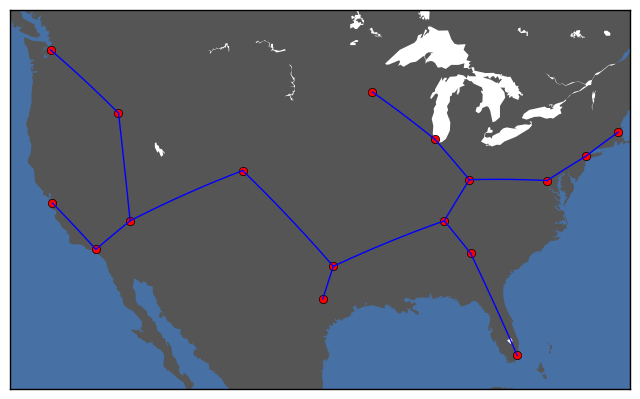

In [6]:
println("Total distance across network, in miles: ",getobjectivevalue(m));
mapSolution(getvalue(edge)) #Print map of network

In the first part of the project, a minimal connected graph is obtained over the cities, which we plotted above. Interestingly, our result seems like a tree, with no cycles. In fact, our solution to this problem coincides with the solution to the minimal spanning tree formulation (see Appendix A). None of our constraints explicitly enforce a tree structure on the final graph. However, from graph theory, we know that minimal spanning trees are connected subgraphs with the lowest total weight across all edges. Hence, it should come as no surprise that we get this optimal result. Trees inherently lack any cycles, meaning there is a unique path between any pairs of points. Cycles intuitively cause redundant paths between any 2 nodes, a needless waste (in our model) when attempting to minimize the amount of cabling needed. So trees seem like the ideal structure for our network. And by seeking to span our entire graph while minimizing total edge costs, min spanning trees would fit the bill.

Interestingly, the geographic distribution of these cities suggests that our optimal solution follows along the lines of nearest neighbor clustering. Nodes closer to the center of the map seem to have higher centrality, with more connections and paths flowing through them. The tree structure, in terms of network topology, offers some pros and cons. On one hand, a tree structure allows for hierarchical organization of network resources. Every subtree can form a localized network. However, such tree networks are susceptible to fragmentation of the network when individual cables are put down.  Upon inspection, we can readily see that the removal of any cable from this network would create 2 separate connected components, neither of which could communicate with the other. This lack of redundancy, however cheaper, makes the network more susceptible to outages during cable failures, maintenance, etc. Nonetheless, given these were not components within our model, we cannot expect our solution to fit these goals.

The result might lack some realness to it since an assumption where the total cost of the cable network consists of only the cost per mile of the fiber optic cable is made. Cost such as maintenance cost, cost based on location and time cost are not considered. However, the accuracy of this model might increase if we scale down the model. Instead of connecting major cities, it might be more accurate if the try to connect buildings in a small town with network cables. The location cost should be the same for all buildings since it is in the same location. Other cost would also be smaller. Furthermore, in the real world, we have to consider direct connection between cities. The speed of the connection might decrease if the cable has to pass through multiple cities before reaching the destination city. Although the total distance of the whole network decrease, the distance between cities might not be optimal.

### Part B: Cost-Bandwidth Trade-Off on 2-Cable Network

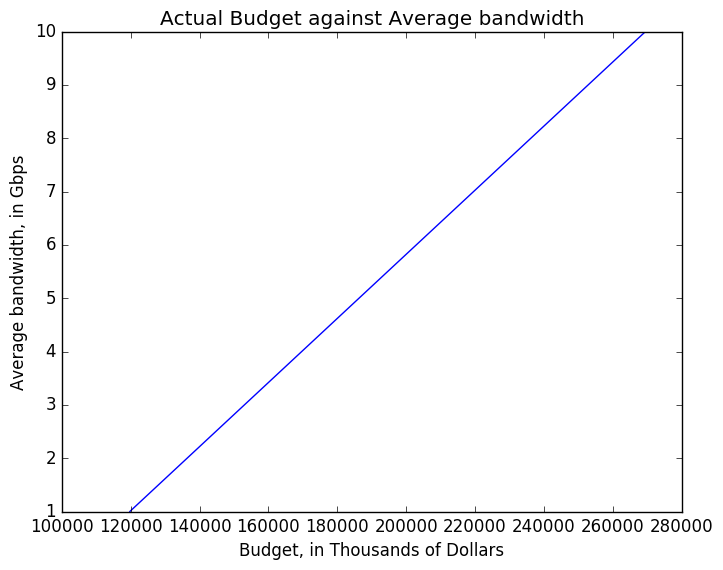

PyObject <matplotlib.text.Text object at 0x31cab59d0>

In [7]:
x = []
y = []
#Run  trade off function multiple bounded budget inputs
for i in 120000:10000:300000
    (c, b) = plotCableTradeoff(i)
    push!(x, c)
    push!(y, b)
end

plot(x,y,"b-");
xlabel("Budget, in Thousands of Dollars")
ylabel("Average bandwidth, in Gbps")
title("Actual Budget against Average bandwidth")

For the second part of the project, the optimal type of cables for each node is calculated for a given budget. A graph is plotted where there are two different type of cables with different cost and bandwidth. In general, a cable with higher cost will provide a higher bandwidth. This might not be the case in the real world as we have to consider more factors such as reliability, toughness and cable type. Nonetheless, we make a quick note of the bounds of this problem around 120000 and 270000 where the line hits 1 and 10 Gbps respectively. We know that the weighted average of the bandwidth must be between 1 and 10, and we see in these bounds the minimal budgets neccessary to create the cheapest network (all 1 Gbps cables, forming a weighted average of 1 Gbps) and the most expensive network (all 10 Gbps, forming a 10 Gbps weighted average bandwidth.

In the relationship graph, we can see that the higher the budget allocated, the higher the average bandwidth of the cable network. This is accurate and can be applied to the real world as the more you can spend, the better the things you can get. If you have an unlimited budget, you will definitely be able to optimize your network of cables. Hence, this tradeoff apply in the real world as there will always be a finite budget and you will have to maximize your cable network based on the finite budget.

We note that this plot is on actual budget, which we bounded above by a budget bound. This linear relationship highlight the fact that the actual cost and average bandwidth are directly related to each other, since both reflect a weighted average of distance with some parameter (cost or bandwidth). If we look at the inputted budget constraint vs the average bandwidth, within a zoomed range:

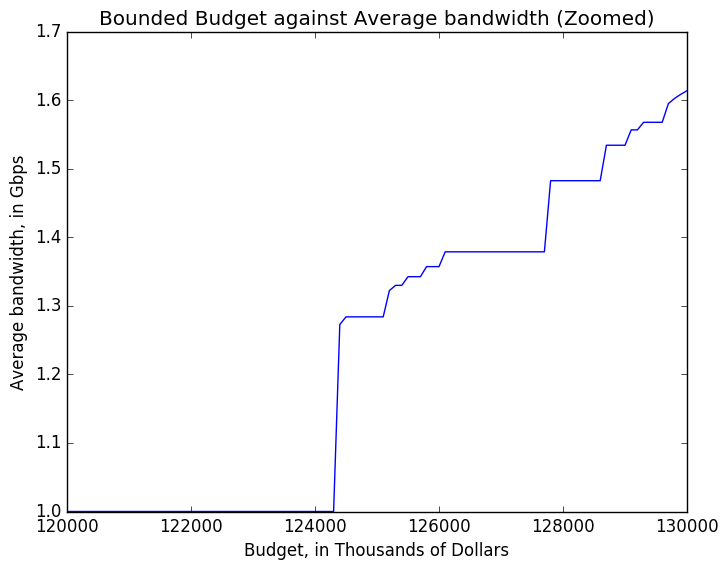

In [8]:
x = []
y = []
#Run  trade off function multiple bounded budget inputs
for i in 120000:100:130000
    (c, b) = plotCableTradeoff(i)
    push!(x, i)
    push!(y, b)
end

plot(x,y,"b-");
xlabel("Budget, in Thousands of Dollars");
ylabel("Average bandwidth, in Gbps");
title("Bounded Budget against Average bandwidth (Zoomed)");

We see a much more jagged, piecewise relationship, albeit positive. Unlike the previous relationship from the actual budget, this bounded budget is not related as directly to bandwidth. As we increase the budget by a constant amount, we can't always offset the cost of switching an entire edge from one type to another. Only when we reach certain cuttoffs can we see a switch to a new optimial solution.

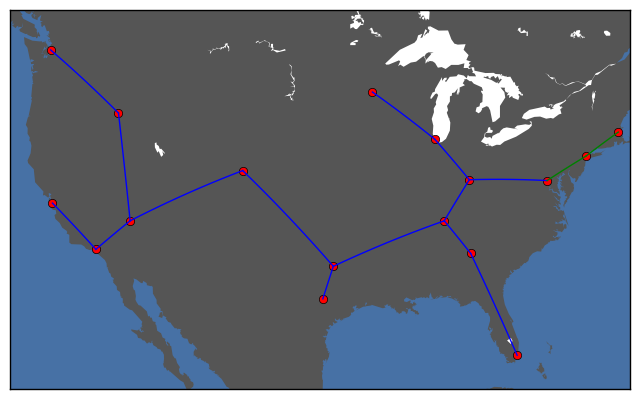

In [9]:
# Plot of sample budgets and their corresponding networks
budgetGiven = 130000; 
(e1,e2) = plotCable(budgetGiven)
mapSolutionB(e1, e2)



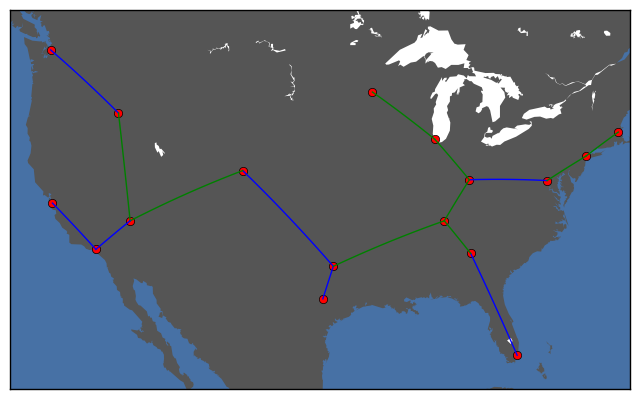

In [10]:
# Larger Budget
budgetGiven = 200000;
(e1,e2) = plotCable(budgetGiven)
mapSolutionB(e1, e2)


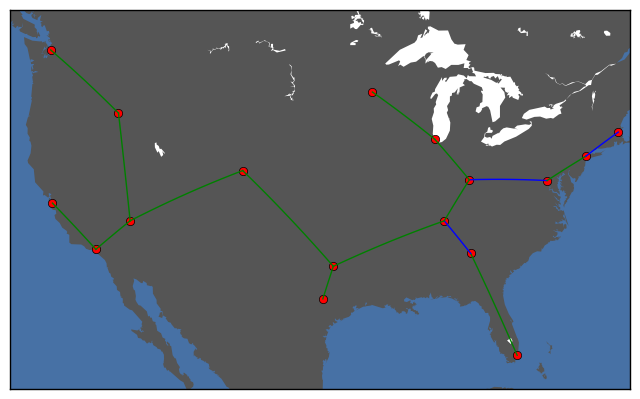

In [11]:
# Even Larger budget
budgetGiven = 250000;
(e1,e2) = plotCable(budgetGiven)
mapSolutionB(e1, e2)

Above is a 2-colored graph of the network based on the cable type, with blue as the 1Gbps and orange as the 10 Gbps.

As we increase the budget bound, we see more and more edges converted from 1Gbps to 10Gbps cables. Initially, shorter cable edges are converted over to high speed fiber optics. As we increase further, we see larger cables becoming converted as well. As we approach either bound near 120000 or 270000, we see the prevalance of 1 Gbps and 10 Gbps cables respectively. It is difficult to quantify the order in which new edges are added. While not a part of our model, many computer networks utilize faster and more expensive equipment at central and root nodes/edges which route a lot of traffic. Ideally, when we integrate new faster fiber optic cables, we would prefer to convert central edges over the "leaf" edges near the bounds of the network, as in the first map, where the eastern cities NYC and Boston are the first to get faster cables. Perhaps there is some other cost or constraint we could utilize to bias these choices for cable conversion. 

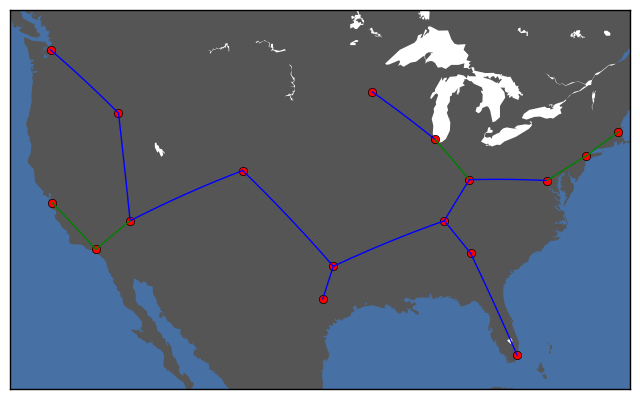

In [12]:
### Interactive! ###
# Set to value between 120000 and 300000 and run!

budgetGiven = 150000; ## Change me!
(e1,e2) = plotCable(budgetGiven)
mapSolutionB(e1, e2)

## 5. Conclusion ##

Overall, we managed to build a modeling pipeline which finds a connected network configuration over 2 cables which creates a clear tradeoff between budget and performance. It remains difficult to gauge the optimality of our 2 subproblem approach against the global optimal solution to our original problem. However, it was interesting to see effective constructs and relationships crop up within our subproblems, from the minimal spanning tree to the near linear relationship between budget and performance. The computational performance on both these methods was impressive as well, managing to solve our problem on n=17 data points, where the expected solution space of possible graphs explodes in n. Our 2 subproblem models are each distinctive and easy to interpret individually with respect to the overall objectives and constraints. What's more, both are ripe for additional components and extensions achieve greater adherance to real world goals and constraints. Our formulation of the network flow problem allows us to consider arbitrary connected graphs, upon which we could apply constraints in redundancy of routes, total bandwidth, and even finding optimal locations for additional data centers.

One extension of interest to us was trading off costs with latency. Latency costs, or the traffics net speed along a path, are proportional to the distance along the path as well as the hops, or number of nodes passed along path. Not only must the traffic traverse each edge, but each node, as a router, must manage the incoming traffic by queueing, analyzing, and forwarding traffic onto the correct edge in path, causing some additional latency on route. Some methods exist for constraining the max number of hops across all paths on a given network. There are also more complicated methods to constrain the diameter of the network (max weighted distance between any pair of nodes). We attempted to integrate a hop constrained and diameter constrained minimal least square problem into our original solution, studying how costs are traded off with constrained hop length. 

Unfortunately, these NP-hard problems, in their simplest formulations, use many variables (seemingly cubic in node) and are computationally difficult. In the future, while we could attempt to increase our resource power for these models, we were more interested in relaxations of these models as well as different models altogether for solving much more tractable problems, even if they are suboptimal. For example, could we model hops like a network flow problem, restricting flow or formulating a new cost function? Could we heuristically choose a “central vertex” from which we attempt to minimize the max distance from? Could we apply some higher level “regularization” to incentivize network structure with nice properties (e.g. min distance, latency, etc). While these methods may not achieve optimal solutions, they may provide tractable methods for finding pretty good suboptimal solutions.


## 6. Appendix ##

### Part A: Min Spanning Tree Model

Seeking a connected undirected graph with minimal cost, we looked at minimum spanning trees. In our graph, each potential edge from $i \rightarrow j$ has an associated cost $c*d_{i,j}$. Minimizing the cost of our network is equivalent in minimizing the sum of costs of every edge we include in our network. However, we would like a connected graph such that data from any node can reach any other node. The minimum spanning tree provides the optimial connected subgraph with minimum total edge cost. We use the subtour formulation of the min-spanning tree problem from [here](http://www.ieor.berkeley.edu/~ieor266/Lecture25.pdf).


### Model 

#### Decision variables:

Binary indicator for whether edge between i,j exists in our solution network:

$$ 
\begin{aligned}
x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

#### Constraints:

The minimum spanning tree, as a tree, must have exactly n-1 edges:

$$
\sum_{i,j \in V}{x_{i,j} = n-1}
$$

Our tree should not have any self loops:

$$
\begin{aligned}
x_{i,i}=0 && \forall i \in V
\end{aligned}
$$

To prevent disconnected components, we use a subtour elimination constraint that prevents cycles. To do so, we consider every possible subset of nodes S and require that the induced subgraph (that is, the subgraph with edges only between these points) must have less than $|S|-1$ edges. This does require us to generate and enummerate $2^{n}$ constraints since there are $2^{n}$ possible subsets; note that we can ignore trivial and singular subsets (one node subgraph has L-1=0 nodes automatically when enforcing no self-loops). 

$$
\begin{aligned}
\sum_{i,j \in S}{x_{i,j} \leq |S|-1} && \forall S \subset V
\end{aligned}
$$

#### Objective: 
Our choice of edges in our subgraph seeks to minimize the total cost across all included edge weights. To do so, we calculate the weighted sum of each edges' weight with $x_{i,j}$, the binary indicator of whether it is included in our subgraph:

$$f(x)=\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}$$


Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j} \\
\text{subject to:}\qquad& \sum_{i,j \in S}{x_{i,j} \leq |S|-1} && \forall S \subset V\\
& \sum_{i,j \in V}{x_{i,j} = n-1} \\
& x_{i,i}=0 && i \in V \\
& x_{i,j} \in {\{0,1\}} && i,j \in V
\end{aligned}
$$

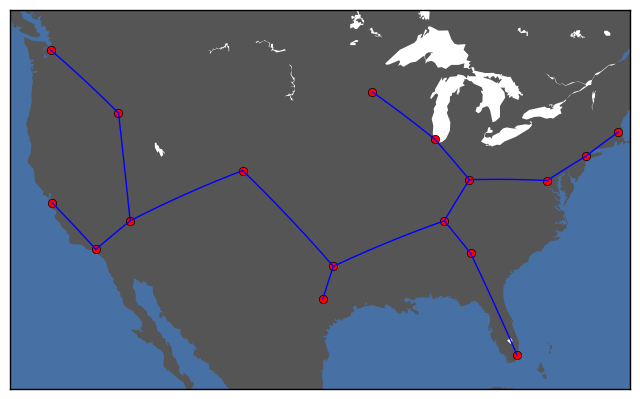

In [13]:
### Warning: This code may stall on slower machines. We had success on some machines (Macbook Air) but failed on some 
### others. We have primarily included it for reference 

m = Model();
@variable(m, edge[centers,centers], Bin) # variable x

@constraint(m, sum(edge) == n-1) # Max number of edges

for i in centers
    @constraint(m,edge[i,i]==0)
end
subsets = genSubsets(n) #Generate all subsets of indexes {1,..,n}
for arr in subsets
    L = length(arr)
    if L > 1 #ignore trivial subsets
        
        # Subtour constraint: Every subset of vertices S must have at most $|S|-1$ edges
        # in induced subgraph
        @constraint(m, sum{ edge[centers[i],centers[j]], i in arr, j in arr } <= L-1)
    end
end

# Min total weight across solution network edges
@objective(m, Min, sum{edge[i,j]*distance[i,j], i in centers, j in centers})


solve(m);
mapSolution(getvalue(edge));

While this min spanning tree model manages to find the minimal tree which connects all the nodes, the model does not allow for more generalized connected graphs (non-trees) for different possible network objectives. Also, the performance was slow, with the model not running on some of our machines. We sought a more generalized model that would allow (feasibly) for non-tree networks.